# Biblioteke

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ukratko o problemu
Na raspolaganju su informacije o razlicitim pacijentima koji imaju srcane probleme. Od interesa je predvideti, na osnovu opstih informacija, da li odredjeni pacijent ima srcani problem.

# Podaci
Podaci koji se koriste smesteni su u datoteci **cardio_train3.csv**. Datoteka sadrzi sledece informacije(atribute) o pacijentima:<br>
- **Starost** (*age*): U danima
- **Visina** (*height*): U *cm*
- **Tezina** (*weight*): U *kg*
- **Pol** (*gender*): Kategoricki atribut - 1=F; 2=M
- **Sistolni/gornji pritisak** (*ap_hi*)
- **Dijastolni/donji pritisak** (*ap_lo*)
- **Holesterol** (*cholesterol*): Kategoricki atribut - 1=Normalan; 2=Iznad normale; 3=Dosta iznad normale
- **Glukoza** (*gluc*): Kategoricki atribut - 1=Normalan; 2=Iznad normale; 3=Dosta iznad normale
- **Konzumira cigarete** (*smoke*): Kategoricki atribut - 0=Ne; 1=Da
- **Konzumira alkohol**(*alco*): Kategoricki atribut - 0=Ne; 1=Da
- **Fizicka aktivnost** (*active*): Kategoricki atribut - 0=Ne; 1=Da
- **Ima srcanih problema** (*cardio*): Kategoricki atribut - 0=Ne; 1=Da

# Dohvatanje podataka

In [448]:
patients = pd.read_csv('cardio_train3.csv')

## Opste informacije o ucitanim podacima

In [449]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Provera da li postoje null vrednosti i duplikati

In [450]:
# Da li postoje Null vrednosti
print(patients.isnull().sum(), '\n')
print('Postoji bar jedna Null vrednost:',patients.isnull().values.any(), '\n')
# Ukupan broj Null vrednosti u Dataset-u
print('Ukupan broj Null vrednosti:', patients.isnull().sum().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64 

Postoji bar jedna Null vrednost: False 

Ukupan broj Null vrednosti: 0


In [451]:
print("Broj duplikata: {}".format(patients.duplicated().sum()))

Broj duplikata: 0


## Provera da li postoje primerci koji odstupaju od proseka

In [452]:
patients.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

**Mozemo da primetimo da kolone '*age*', '*height*', '*weight*', '*ap_hi*', '*ap_lo*' mozda imaju primerke koji odstupaju od proseka.**
- npr ako uporedimo prosecnu(mean) vrednost atributa *ap_hi* i *ap_lo* sa minimalnom i maksimalnom vrednoscu, mozemo da pretpostavimo da postoje primerci koji dosta odstupaju
- istim principom mozemo doci do zakljucka i za atribute *height* i *weight*

**Postavicemo granice za gornji i donji pritisak (min, max) kao i za visinu i tezinu.**
- ap_hi = (80, 200)
- ap_lo = (30, 120)
- height = (130, 240)
- weight = (30, 300)

In [453]:
bounds = pd.DataFrame(index=['lower_bound', 'upper_bound'])
bounds['ap_hi'] = [80, 200]
bounds['ap_lo'] = [30, 120]
bounds['height'] = [130, 240]
bounds['weight'] = [30, 300]
bounds['age'] = [12000, 24000]
bounds

ap_hi  ap_lo  height  weight    age
lower_bound     80     30     130      30  12000
upper_bound    200    120     240     300  24000

Sada mozemo da eliminisemo sve primerke ciji atributi nisu u odredjenim opsezima.

In [454]:
ap_hi_filter0 = (patients["ap_hi"] > bounds["ap_hi"][1])
ap_hi_filter1 = (patients["ap_hi"] < bounds["ap_hi"][0])

ap_lo_filter0 = (patients["ap_lo"] > bounds["ap_lo"][1])
ap_lo_filter1 = (patients["ap_lo"] < bounds["ap_lo"][0])

height_filter0 = (patients["height"] > bounds["height"][1])
height_filter1 = (patients["height"] < bounds["height"][0])

weight_filter0 = (patients["ap_lo"] > bounds["ap_lo"][1])
weight_filter1 = (patients["ap_lo"] < bounds["ap_lo"][0])

age_filter0 = (patients["age"] > bounds["age"][1])
age_filter1 = (patients["age"] < bounds["age"][0])

outliers = (ap_hi_filter0 | ap_lo_filter0 | ap_hi_filter1 | ap_lo_filter1 | height_filter0 | height_filter1 | weight_filter0 | weight_filter1 | age_filter0 | age_filter1)
print("Postoji {} primeraka koji odstupaju\n".format(patients[outliers]["cardio"].count()))

# Eliminacija primeraka koji odstupaju
patients = patients[~outliers]
patients.info()

Postoji 1468 primeraka koji odstupaju

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68532 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68532 non-null  int64  
 1   age          68532 non-null  int64  
 2   gender       68532 non-null  int64  
 3   height       68532 non-null  int64  
 4   weight       68532 non-null  float64
 5   ap_hi        68532 non-null  int64  
 6   ap_lo        68532 non-null  int64  
 7   cholesterol  68532 non-null  int64  
 8   gluc         68532 non-null  int64  
 9   smoke        68532 non-null  int64  
 10  alco         68532 non-null  int64  
 11  active       68532 non-null  int64  
 12  cardio       68532 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.3 MB


# Analiza podataka

## 1. Analiza pojedinacnih atributa

### 1.1. *gender*
**- Pogledajmo broj primeraka iz *dataset*-a koji odgovaraju muskom i zenskom polu.**
- 1 - zensko
- 2 - musko

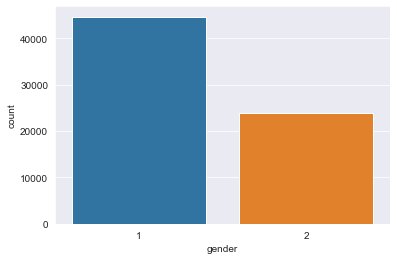

In [455]:
#sns.set_theme(style="darkgrid")
sns.set_style(style='darkgrid')
sns.countplot(x='gender', data=patients)

### 1.2. *years* (*age*)
**- Atribut 'age' delimo sa 365 kako bismo dobili broj godina pacijenta i rezultat smestamo u novi atribut 'years'**<br>
**- Prikazujemo grafik raspodele atributa 'years' tj. broj godina**

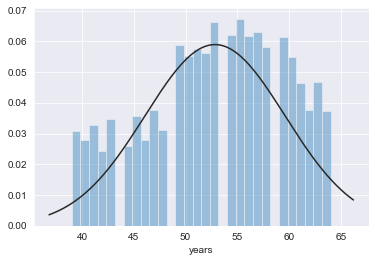

In [456]:
from scipy.stats import norm
years = patients['age'] /365
patients['years'] = years.astype(int)
sns.distplot(patients['years'], bins=30, fit=norm, kde=False)

Mozemo da primetimo da svi pacijenti iz *dataset-a* imaju izmedju 40 i 65 godina

### 1.3. ap_hi, ap_lo (gornji, donji pritisak)
**- Prikazujemo grafik raspodele atributa 'ap_hi' i 'ap_lo'**

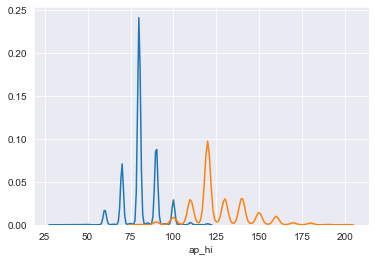

In [457]:
sns.distplot(patients['ap_lo'], bins=30, hist=False)
sns.distplot(patients['ap_hi'], bins=30, hist=False)

### 1.4. height (visina)
**- Prikazujemo grafik raspodele atributa 'height'**

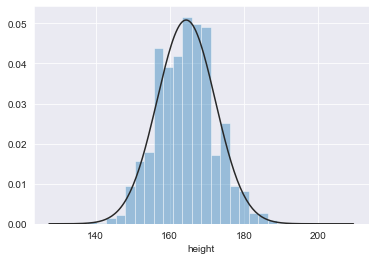

In [458]:
sns.distplot(patients['height'], bins=30, kde=False, fit=norm)

### 1.4. weight (tezina)
**- Prikazujemo grafik raspodele atributa 'weight'**

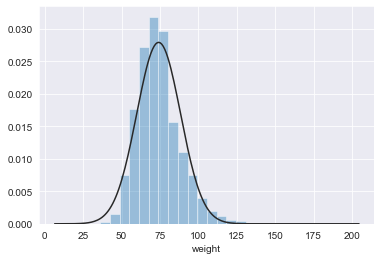

In [459]:
sns.distplot(patients['weight'], bins=30, kde=False, fit=norm)

### 1.5. Prikaz grafika svih ostalih(kategorickih) atributa

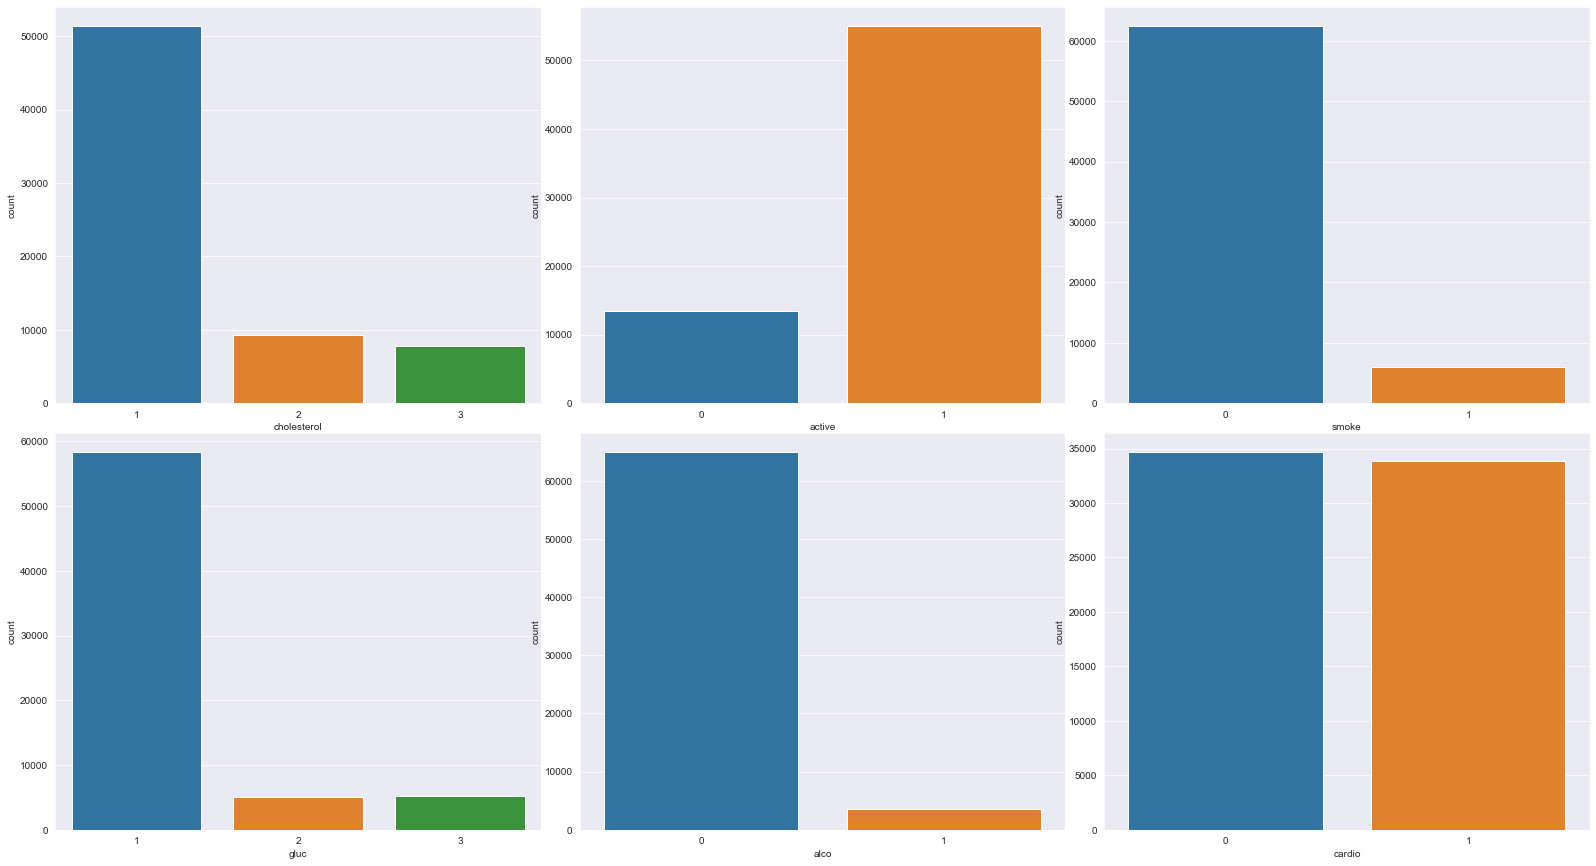

In [461]:
atts = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
fig, ax =plt.subplots(2,3,figsize=(22,12))
fig.tight_layout()
sns.countplot(x='cholesterol', ax=ax[0,0], data=patients)
sns.countplot(x='active', ax=ax[0,1], data=patients)
sns.countplot(x='smoke', ax=ax[0,2], data=patients)
sns.countplot(x='gluc', ax=ax[1,0], data=patients)
sns.countplot(x='alco', ax=ax[1,1], data=patients)
sns.countplot(x='cardio', ax=ax[1,2], data=patients)

## 2. Analiza relacija izmedju atributa

**Atribut '*cardio*' je ciljna promenljiva te cemo nju posmatrati u odnosu na ostale atribute**

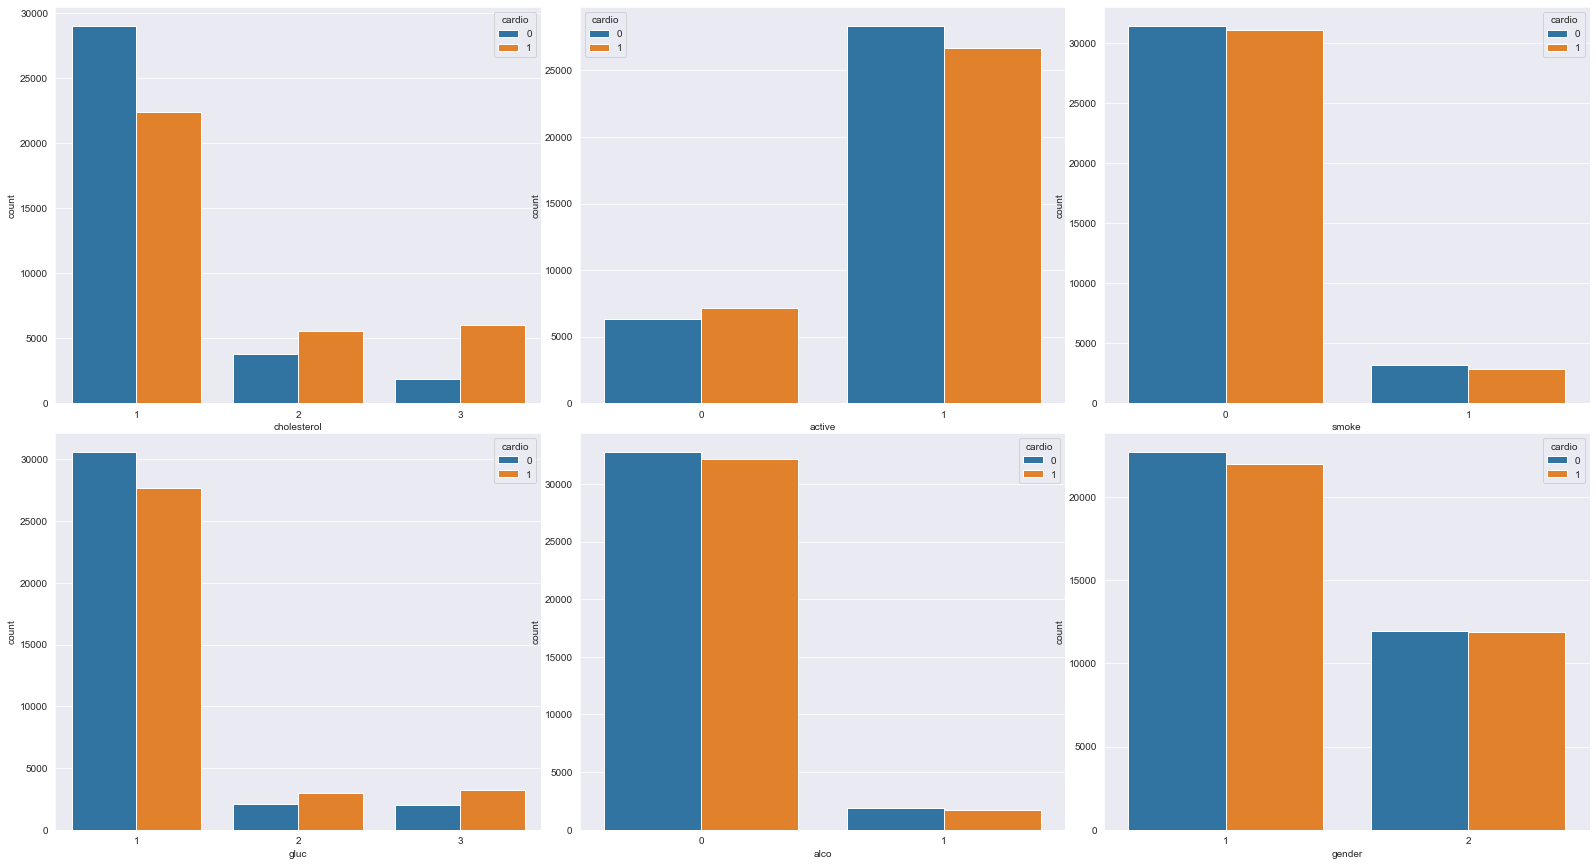

In [462]:
atts = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'gender']
fig, ax =plt.subplots(2,3,figsize=(22,12))
fig.tight_layout()
sns.countplot(x='cholesterol', ax=ax[0,0], data=patients, hue='cardio')
sns.countplot(x='active', ax=ax[0,1], data=patients, hue='cardio')
sns.countplot(x='smoke', ax=ax[0,2], data=patients, hue='cardio')
sns.countplot(x='gluc', ax=ax[1,0], data=patients, hue='cardio')
sns.countplot(x='alco', ax=ax[1,1], data=patients, hue='cardio')
sns.countplot(x='gender', ax=ax[1,2], data=patients, hue='cardio')

Na osnovu grafika iznad mozemo da primetimo da vecina pacijenata koji **imaju** kardiovaskularne probleme:
- imaju normalan holesterol
- aktivni su
- nisu pusaci
- nivo glukoze je normalan
- ne konzumiraju alkohol

Ovi rezultati su neocekivani.

Da bismo sto bolje utvrdili koji atributi najvise uticu na ciljnu promenljivu '*cardio*' prikazacemo korelacionu matricu.

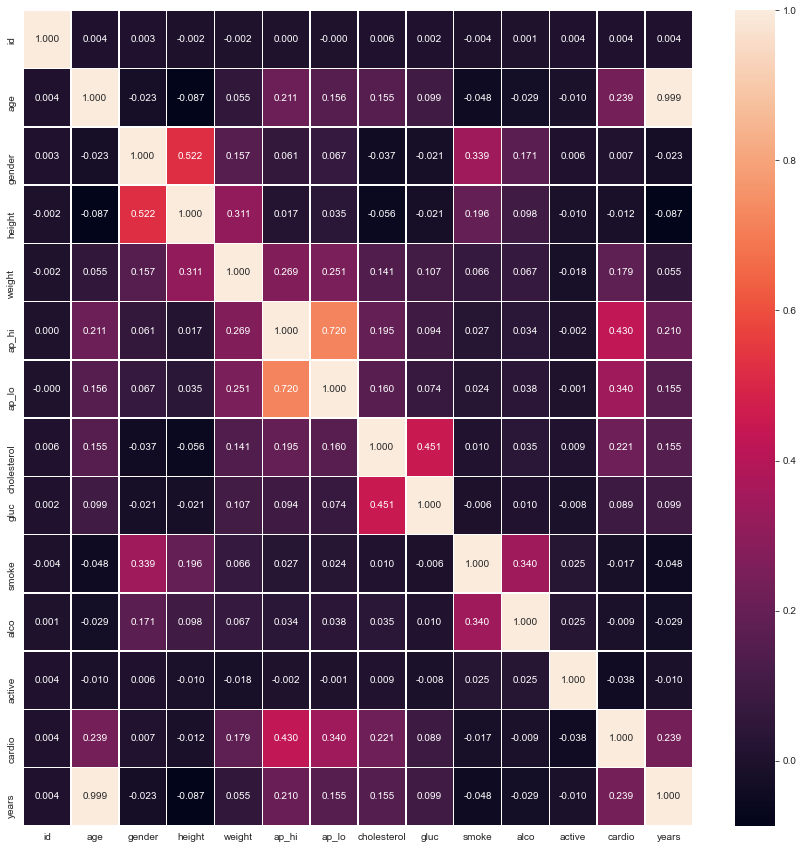

In [463]:
corr = patients.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

Atributi koji su u najvecoj korelaciji sa atributom '*cardio*':
- ap_hi
- ap_lo
- years(age)
- weight
- cholesterol

**Prikazacemo 2 raspodele po godinama. Jedna raspodela po godinama se odnosi na pacijente koji nemaju kardiovaskularne probleme(plava linija), dok se druga odnosi na one koji imaju(crvena linija)**

In [464]:
pat_cardio0 = (patients['cardio'] == 0)
pat_cardio1 = (patients['cardio'] == 1)

pat_years_cardio0 = patients[pat_cardio0]
pat_years_cardio1 = patients[pat_cardio1]

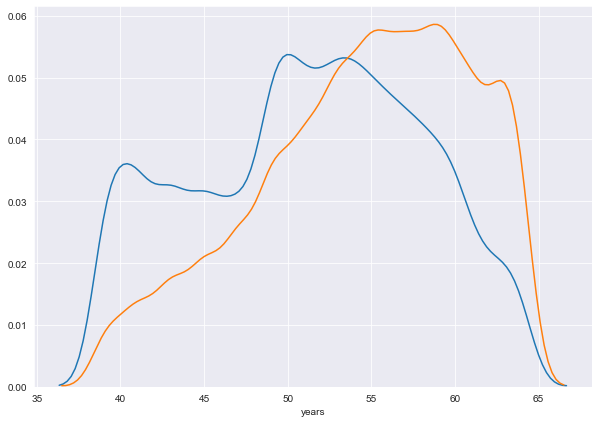

In [465]:
f, ax = plt.subplots(figsize = (10,7))
sns.distplot(pat_years_cardio0['years'], hist=False) #plava linija na grafiku
sns.distplot(pat_years_cardio1['years'], hist=False) #crvena linija na grafiku

**Prikaz nivoa holesterola u odnosu na godine pacijenta sa grupisanjem po atributu '*cardio*'**

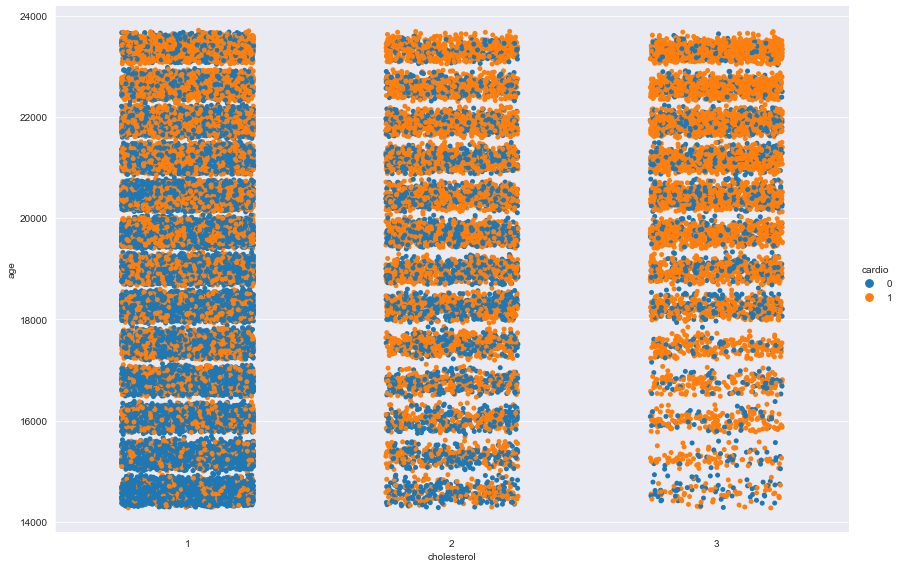

In [466]:
sns.catplot(x='cholesterol', y='age', hue='cardio', data=patients, jitter='0.25', height=8, aspect=1.5)
#sns.stripplot(x="cholesterol", y="years", data=patients, jitter=0.55)

**Prikaz grafika odnosa gornjeg i donjeg pritiska pacijenta sa grupisanjem po atributu '*cardio*'**

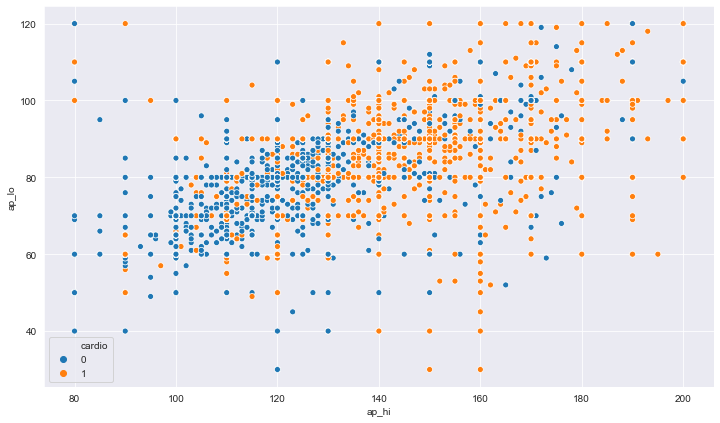

In [467]:
f, ax = plt.subplots(figsize = (12,7))
sns.scatterplot(data=patients, x='ap_hi', y='ap_lo', hue='cardio')

# Trening i test podaci

In [469]:
y = patients['cardio']

In [470]:
X = patients[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active']]

In [471]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [472]:
#normalizacija atributa
from sklearn.preprocessing import normalize
X_train = normalize(X_train)
X_test = normalize(X_test)

# Stabla odlucivanja i KNN

In [473]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [474]:
dtree = DecisionTreeClassifier(criterion='entropy')
knn = KNeighborsClassifier(n_neighbors=100)

In [475]:
modeli = {"Stabla odlucivanja" : dtree,
          "KNN" : knn}
scores = {}

In [495]:
dtree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=349)

# Predikcija i evaluacija

Tacnost predikcije (%)
KNN                              70.802529
Stabla odlucivanja               64.153696
KNN Optimal                       0.000000

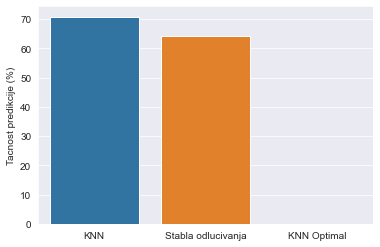

In [496]:
scores['Stabla odlucivanja'] = dtree.score(X_test, y_test)*100
scores['KNN'] = knn.score(X_test, y_test)*100
scores['KNN Optimal'] = 0

scores_table= pd.DataFrame(scores, index=["Tacnost predikcije (%)"]).T
scores_table.sort_values(by=["Tacnost predikcije (%)"], axis=0 ,ascending=False, inplace=True)
sns.barplot(x=scores_table.index,y=scores_table["Tacnost predikcije (%)"])
scores_table

### *Confusion Matrix* i *Classification Report*

In [478]:
dtree_predictions = dtree.predict(X_test)
knn_predictions = knn.predict(X_test)

In [479]:
from sklearn.metrics import confusion_matrix
cm_dtree = confusion_matrix(y_test, dtree_predictions)
cm_knn = confusion_matrix(y_test, knn_predictions)

              precision    recall  f1-score   support

           0       0.64      0.64      0.64     10398
           1       0.63      0.63      0.63     10162

    accuracy                           0.64     20560
   macro avg       0.64      0.64      0.64     20560
weighted avg       0.64      0.64      0.64     20560

              precision    recall  f1-score   support

           0       0.69      0.78      0.73     10398
           1       0.74      0.64      0.69     10162

    accuracy                           0.71     20560
   macro avg       0.71      0.71      0.71     20560
weighted avg       0.71      0.71      0.71     20560



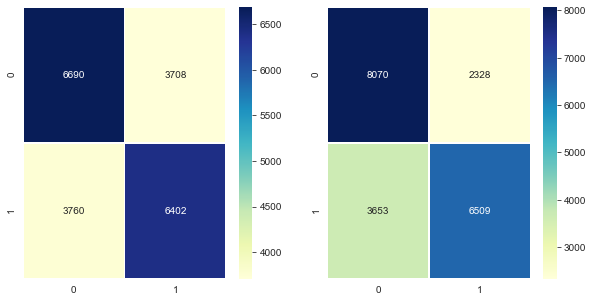

In [516]:
print(classification_report(y_test,dtree_predictions))
print(classification_report(y_test,knn_predictions))
f, ax = plt.subplots(1,2,figsize=(10,5))
fig.tight_layout()
sns.heatmap(cm_dtree,fmt=".0f", annot=True,linewidths=0.5, linecolor="white", ax=ax[0], cmap="YlGnBu")
sns.heatmap(cm_knn,fmt=".0f", annot=True,linewidths=0.5, linecolor="white", ax=ax[1], cmap="YlGnBu")

Na osnovu rezultata i grafika, **KNN** algoritam se pokazuje kao efikasniji u odnosu na **Stabla odlucivanja**<br>
Za **KNN** algoritam smo uzeli vrednost za **k**=100, sto ne mora da znaci da je za tu vrednost **KNN** najefikasniji. Cilj nam je da pronadjemo **k** takvo da algoritam bude optimalan.

### Biranje vrednosti k za KNN
Koristimo '***Elbow***' metod za trazenje optimalne vrednosti k

In [485]:
error_rate = []

# Will take some time
for i in range(1,200):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [486]:
error_rate1 = []
for i in range(200,250):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate1.append(np.mean(pred_i != y_test))

In [487]:
error_rate2 = []
for i in range(250,350):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate2.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

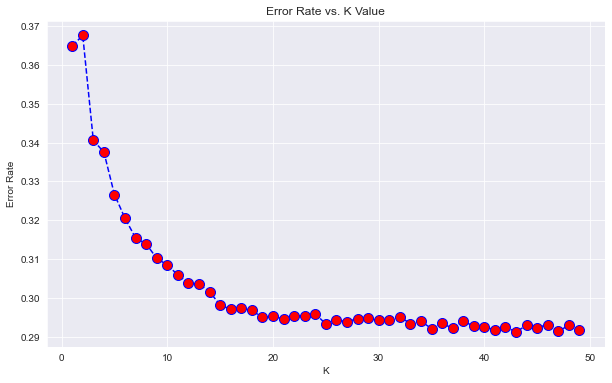

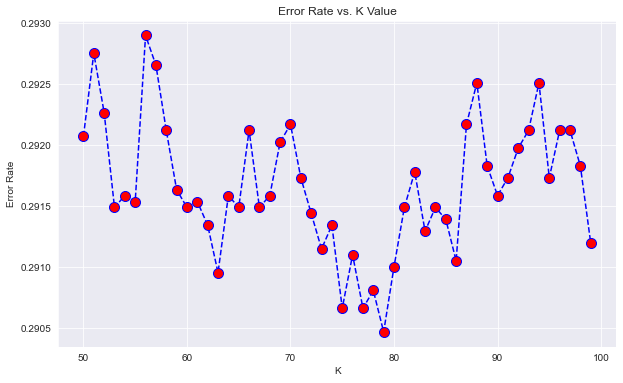

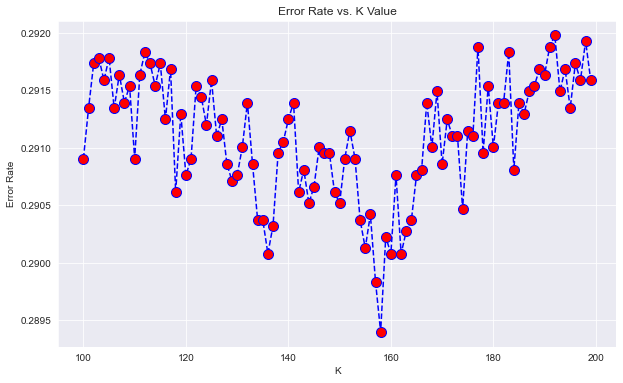

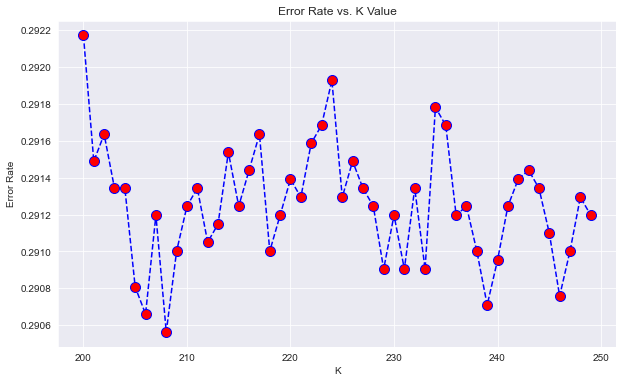

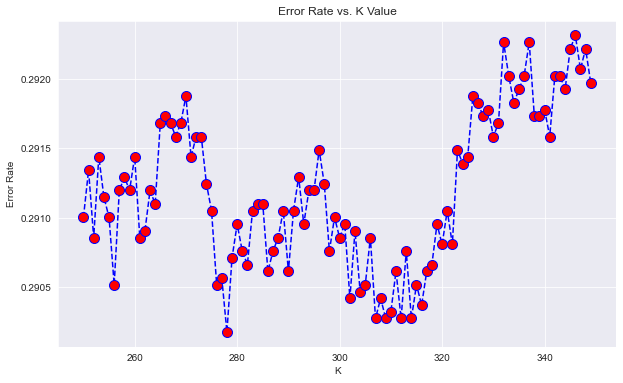

In [492]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate[0:49],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
#################################################

plt.figure(figsize=(10,6))
plt.plot(range(50,100),error_rate[49:99],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

plt.figure(figsize=(10,6))
plt.plot(range(100,200),error_rate[99:199],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
#################################################

plt.figure(figsize=(10,6))
plt.plot(range(200,250),error_rate1,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
#################################################

plt.figure(figsize=(10,6))
plt.plot(range(250,350),error_rate2,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Na osnovu prethodnih grafika trazimo vrednost **k** takvo da je **Error Rate** najmanji. Biramo vrednost 158.

In [493]:
knnOpt = KNeighborsClassifier(n_neighbors=158)
knnOpt.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=158)

In [526]:
scores_table.loc['KNN Optimal'] = knnOpt.score(X_test, y_test)*100
scores_table

Tacnost predikcije (%)
KNN                              70.802529
Stabla odlucivanja               64.153696
KNN Optimal                      71.060311

### *Confusion Matrix* i *Classification Report*

In [527]:
knnOpt_predictions = knnOpt.predict(X_test)
cm_knnOpt = confusion_matrix(y_test, knnOpt_predictions)

In [528]:
print("Stablo odlucivanja:\n",classification_report(y_test,dtree_predictions), "\n")
print("KNN:\n",classification_report(y_test,knn_predictions), "\n")
print("KNN optimalno:\n",classification_report(y_test,knnOpt_predictions), "\n")

Stablo odlucivanja:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64     10398
           1       0.63      0.63      0.63     10162

    accuracy                           0.64     20560
   macro avg       0.64      0.64      0.64     20560
weighted avg       0.64      0.64      0.64     20560
 

KNN:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73     10398
           1       0.74      0.64      0.69     10162

    accuracy                           0.71     20560
   macro avg       0.71      0.71      0.71     20560
weighted avg       0.71      0.71      0.71     20560
 

KNN optimalno:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73     10398
           1       0.74      0.64      0.69     10162

    accuracy                           0.71     20560
   macro avg       0.71      0.71      0.71     20560
weighted avg       0.71    

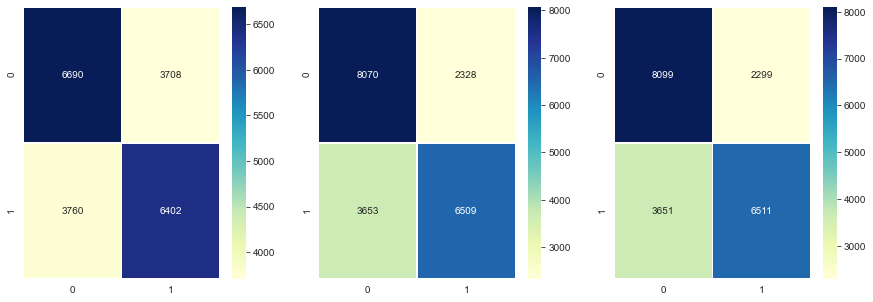

In [529]:
f, ax = plt.subplots(1,3,figsize=(15,5))
fig.tight_layout()
sns.heatmap(cm_dtree,fmt=".0f", annot=True,linewidths=0.5, linecolor="white", ax=ax[0], cmap="YlGnBu")
sns.heatmap(cm_knn,fmt=".0f", annot=True,linewidths=0.5, linecolor="white", ax=ax[1], cmap="YlGnBu")
sns.heatmap(cm_knnOpt,fmt=".0f", annot=True,linewidths=0.5, linecolor="white", ax=ax[2], cmap="YlGnBu")

# Vizuelizacija stabla

In [514]:
from IPython.display import Image  
from io import StringIO
from sklearn.tree import export_graphviz
import pydot 
from sklearn import tree

features = list(X.columns)
features

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active']

In [88]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=features,  
                                class_names=True,
                                filled=True, rounded=True,  
                                special_characters=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [234]:
dtree.max_features